In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Image, display, Math, Latex

In [2]:
f = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)

### Histograma

In [24]:
M,N = f.shape
x, y, i = 0,0,0
Lmax = 256
H = [0] * Lmax

In [25]:
for x in range(M-1):
    for y in range(N-1):
        H[f[x][y]] = H[f[x][y]]+1

In [49]:
f[0][0]

255

### Equalização de Histograma

#### Probabilidade Pf com que cada nível de cinza K aparece na imagem f

In [35]:
Pf = [0] * Lmax
Sum_H = sum(H)

81771

In [37]:
for i in range(Lmax):
    Pf[i] = H[i]/Sum_H

#### Calculando a distribuição acumulada de probabilidade

In [40]:
aux = 0
G = [0] * Lmax
for i in range(Lmax):
    aux = aux + Pf[i]
    G[i] = aux

#### Substituição de G pelo nivel de cinza mais próximo

In [42]:
G_Lmax = [0] * Lmax
for i in range(Lmax):
    G_Lmax[i] = G[i] * (Lmax-1)

In [45]:
G_round = [0] * Lmax
for i in range(Lmax):
    G_round[i] = round(G_Lmax[i])

#### Nfk = H

In [51]:
N_Gk = [0] * Lmax
for i in range(Lmax):
    if(i == G_round[i]):
        N_Gk[i] = H[i]
    else:
        N_Gk[G_round[i]] = H[i]

In [93]:
f_final = [[0] * M] * N
np.shape(f_final)

(292, 282)

In [96]:
f_final = np.zeros_like(f)
# applying transfered values for each pixels
for i in range(0,M-1):
    for j in range(0,N-1):
        f_final[i][j] = G_round[f[i][j]]

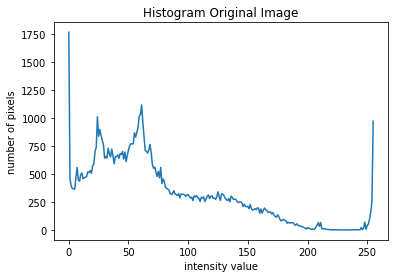

In [55]:
plt.plot(H)
plt.xlabel('Valor de intensidade')
plt.ylabel('Numero de pixels')
plt.title('Histograma Imagem Original')
plt.show()

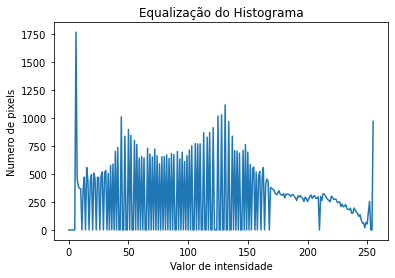

In [74]:
plt.plot(N_Gk)
plt.xlabel('Valor de intensidade')
plt.ylabel('Numero de pixels')
plt.title('Equalização do Histograma')
plt.show()

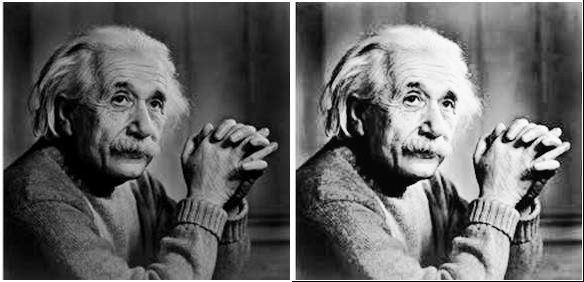

In [99]:
comparison_HE = np.hstack((f,f_final))
cv2.imwrite("comparison_HE.jpg",comparison_HE)
Image(filename='comparison_HE.jpg') 